In [25]:
import tensorflow as tf
import pathlib
from PIL import Image
import cv2     
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from tqdm import tqdm
import numpy as np
from tensorflow import keras
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,MaxPool2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import applications
from keras.optimizers import SGD
%matplotlib inline
print(tf.__version__)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


In [26]:
data_train_root = r'./dataset/Animal/Cat&Dog/train'+'/*'
print(data_train_root)

./dataset/Animal/Cat&Dog/train/*


In [27]:
class_name=dict()
tag_name = {1:"cat", 0:"dog"}

In [28]:
i = 0
train_images = list()
train_labels = list()
from tensorflow.keras.preprocessing.image import img_to_array,array_to_img
for img_path in glob(data_train_root):
    img = load_img(str(img_path),target_size=[80, 80])
    arr = img_to_array(img)/255.0
    train_images.append(arr)
    if 'dog' in img_path:
        train_labels.append(0)
    elif 'cat' in img_path:
        train_labels.append(1)
    else:
        train_labels.append(2)

In [29]:
print(len(train_images))
print(len(train_labels))

25000
25000


In [30]:
train_images = np.array(train_images,dtype=float)
train_labels = np.array(train_labels)
#train_labels = tf.keras.utils.to_categorical(train_labels,2)

In [31]:
print(train_labels)

[0 1 0 ... 0 1 1]


In [32]:
print(train_images.shape)
print(train_labels.shape)

(25000, 80, 80, 3)
(25000,)


In [33]:
def display_images(images, labels):
        plt.figure(figsize=(10,10))
        grid_size = min(25, len(images))
        for i in range(grid_size):
                plt.subplot(5, 5, i+1)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)
                plt.imshow(images[i], cmap=plt.cm.binary)
                plt.xlabel(tag_name[labels[i]])

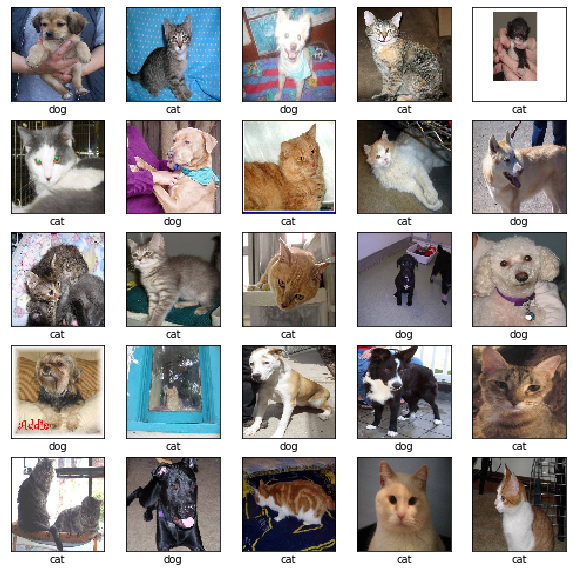

In [34]:
display_images(train_images, train_labels)
plt.show()

In [35]:
# input_layer = tf.keras.Input(shape=train_images.shape[1:])
# conv0_0 = Conv2D(filters=64,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(input_layer)
# conv0_1 = Conv2D(filters=64,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv0_0)

# pool1_0 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv0_1)
# conv1_1 = Conv2D(filters=128,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(pool1_0)
# conv1_2 = Conv2D(filters=128,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv1_1)

# pool2_0 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv1_2)
# conv2_1 = Conv2D(filters=256,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(pool2_0)
# conv2_2 = Conv2D(filters=256,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv2_1)
# conv2_3 = Conv2D(filters=256,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv2_2)
# conv2_4 = Conv2D(filters=256,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv2_3)

# pool3_0 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv2_4)
# conv3_1 = Conv2D(filters=512,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(pool3_0)
# conv3_2 = Conv2D(filters=512,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv3_1)
# conv3_3 = Conv2D(filters=512,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv3_2)
# conv3_4 = Conv2D(filters=512,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv3_3)

# pool4_0 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv3_4)
# conv4_1 = Conv2D(filters=512,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(pool4_0)
# conv4_2 = Conv2D(filters=512,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv4_1)
# conv4_3 = Conv2D(filters=512,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv4_2)
# conv4_4 = Conv2D(filters=512,kernel_size=(3,3),strides =(1,1),padding='SAME',activation='relu')(conv4_3)

# pool5 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv4_4)
# flat = keras.layers.Flatten()(pool5)
# dense1 = keras.layers.Dense(units=4096,activation='relu')(flat)
# dropout = keras.layers.Dropout(0.4)(dense1)
# dense2 = keras.layers.Dense(units=4096,activation='relu')(dropout)
# dense3 = keras.layers.Dense(units=2,activation='sigmoid')(dense2)
# VGG19 = keras.models.Model([input_layer],dense3)
# VGG19.compile(optimizer = 'sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# VGG19.summary()

model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=train_images.shape[1:],padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
epochs = 50
lrate = 0.01
decay = lrate/epochs
#sgd = SGD(lr=lrate,momentum = 0.9,decay=decay,nesterov=False)
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 80, 80, 32)        896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 40, 40, 32)        9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 10, 10, 64)       

In [36]:
##train_images,train_labels = shuffle(train_images,train_labels)

In [14]:
# model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

In [17]:
train_tmp_images,train_tmp_labels = shuffle(train_images,train_labels)

In [18]:
length = len(train_images)*0.8

images_to_train = train_tmp_images[:int(length)]
labels_to_train = train_tmp_labels[:int(length)]

In [19]:
print(labels_to_train)

[0 0 1 ... 1 1 1]


In [40]:
model.fit(train_images, train_labels, epochs=5,batch_size=32,shuffle=True)

Train on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 90s 4ms/sample - loss: 0.2345 - accuracy: 0.9018
Epoch 2/5
25000/25000 [==============================] - 90s 4ms/sample - loss: 0.2275 - accuracy: 0.9068
Epoch 3/5
25000/25000 [==============================] - 90s 4ms/sample - loss: 0.2201 - accuracy: 0.9083
Epoch 4/5
25000/25000 [==============================] - 90s 4ms/sample - loss: 0.2197 - accuracy: 0.9097
Epoch 5/5
25000/25000 [==============================] - 90s 4ms/sample - loss: 0.2072 - accuracy: 0.9140


In [41]:
from keras.models import load_model

model.save('my_model.h5')

In [42]:
print("evaluate......")
scroe, accuracy = model.evaluate(train_images[10000:], train_labels[10000:])

evaluate......
15000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [43]:
print('scroe:', scroe, 'accuracy:', accuracy)

scroe: 0.15713589073022208 accuracy: 0.9397333


In [61]:
predictions_train = model.predict(train_images[1000:])

In [62]:
print(predictions_train)
result_train = list()
for i in predictions_train:
    if i[0]>i[1]:
        result_train.append(0)
    else:
        result_train.append(1)

[[8.7893159e-06 9.9999118e-01]
 [8.6158752e-01 1.3841255e-01]
 [9.7099090e-01 2.9009124e-02]
 ...
 [9.9959677e-01 4.0325758e-04]
 [9.0865782e-03 9.9091339e-01]
 [3.1657849e-02 9.6834219e-01]]


In [63]:
result_train = np.array(result_train)
scroe_train, accuracy_train = model.evaluate(train_images[1000:], result_train)

24000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [64]:
print('scroe:', scroe_train, 'accuracy:', accuracy_train)

scroe: 0.10930116680761179 accuracy: 1.0


In [44]:
data_test_root = r'./dataset/Animal/Cat&Dog/test'+'/*.jpg'
print(data_test_root)

./dataset/Animal/Cat&Dog/test/*.jpg


In [45]:
test_images = list()
test_labels = list()
for img_path in glob(data_test_root):
    img = load_img(str(img_path),target_size=[80, 80])
    arr = img_to_array(img)/255.0
    test_images.append(arr)

In [46]:
test_images = np.array(test_images,dtype=float)

In [ ]:
# print(train_images.shape)
# print(train_labels.shape)

In [ ]:
#model.evaluate(test_images, test_labels)

In [47]:
predictions = model.predict(test_images)

In [49]:
print(predictions)
result = list()
for i in predictions:
    if i[0]>i[1]:
        result.append(0)
    else:
        result.append(1)

[[1.03773728e-01 8.96226287e-01]
 [6.53486431e-01 3.46513599e-01]
 [9.89684820e-01 1.03151463e-02]
 ...
 [1.24288835e-01 8.75711143e-01]
 [1.39695229e-02 9.86030459e-01]
 [1.00000000e+00 9.87970039e-10]]


In [54]:
print(test_images.shape)
print(len(result))
result = np.array(result)
print(result.shape)
scroe_test, accuracy_test = model.evaluate(test_images, result)

(12500, 80, 80, 3)
12500
(12500,)
12500/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

scroe: 0.12386555271387101 accuracy: 1.0


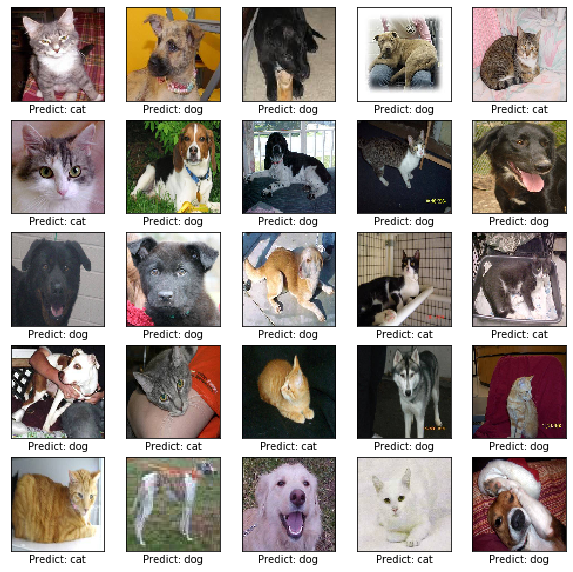

In [86]:
print('scroe:', scroe_test, 'accuracy:', accuracy_test)
def display_train_images(images, train_labels,labels):
        plt.figure(figsize=(10,10))
        grid_size = min(25, len(images))
        for i in range(grid_size):
                plt.subplot(5, 5, i+1)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)
                plt.imshow(images[i], cmap=plt.cm.binary)
                plt.ylabel("Correct: "+tag_name[train_labels[i]])
                plt.xlabel("Predict: "+tag_name[labels[i]])
display_train_images(train_images[1000:], train_labels[1000:],result_train)
plt.show()

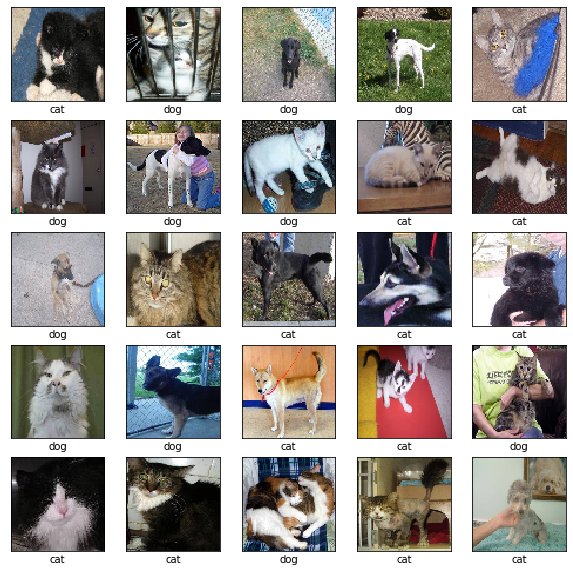

In [60]:
def display_test_images(images, labels):
        plt.figure(figsize=(10,10))
        grid_size = min(25, len(images))
        for i in range(grid_size):
                plt.subplot(5, 5, i+1)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)
                plt.imshow(images[i], cmap=plt.cm.binary)
                plt.xlabel(tag_name[labels[i]])
display_test_images(test_images, result)
plt.show()

In [ ]:
# predictions_2 = model.predict(train_images)

In [ ]:
# print(len(predictions_2))

In [ ]:
# k = 0
# train_test_labels = list()
# for i in range(len(predictions_2)):
#     train_test_labels.append(np.argmax(predictions[i]))
#     print(k,train_labels[i],np.argmax(predictions[i]))
#     if k == 50:
#         break
#     k+=1

In [ ]:
# train_test_labels = np.array(train_test_labels)
# model.evaluate(train_images[:50],train_test_labels[:50])